In [5]:
import shapely
import shapely.ops
import numpy as np
import matplotlib.pyplot as plt
import fiona
from shapely.geometry import shape
import random
from shapely import Point as Point
from rtree import index
import ctypes

class CircleNode:
    def __init__(self,id,center,active_p,active_cost) -> None:
        self.id = id
        self.center = center
        self.active_p = active_p
        self.active_cost = active_cost

    def update_active(self,point,cost):
        self.active_p = point
        self.active_cost = cost

class Node:
    def __init__(self,id,pose,cost,parent = None,children = [],active=True,add_children = True):
        self.id = id
        self.pose =pose
        self.cost = cost
        self.parent = parent
        self.children = children
        self.active = active
        if parent is not None and add_children:
            parent.children.append(self)

    def updateparent(self,data):
        if self.parent is not None:
            idx = 0
            for n in self.parent.children:
                if n.id == data.id:
                    self.parent.children[idx].active = data.active
                    self.parent.updateparent(self.parent)
                    return
                idx+=1

    def updatechildren(self,data):
        if not len(self.children)==0:
            idx = 0
            for n in self.children:
                self.children[idx].parent.active = data.active
                self.children[idx].updatechildren(self.children[idx])
                idx +=1


idx = index.Index()

Node1 = CircleNode(1,Point(0,0),Point(0,0),9)

Node2 = CircleNode(2,Point(2,2),Point(2,2),8)
Node3 = CircleNode(3,Point(4,4),Point(4,4),7)
Node4 = CircleNode(4,Point(6,6),Point(6,6),6)

idx.insert(Node1.id,(Node1.center.x,Node1.center.y),Node1)
idx.insert(Node2.id,(Node2.center.x,Node2.center.y),Node2)

idx.insert(Node3.id,(Node3.center.x,Node3.center.y),Node3)
idx.insert(Node4.id,(Node4.center.x,Node4.center.y),Node4)

p = list(idx.nearest((1.5,1.5),1,objects=True))

# print(p[0].object.center)

idx.delete(p[0].object.id,(p[0].object.center.x,p[0].object.center.y))
Nodei = CircleNode(p[0].object.id,p[0].object.center,p[0].object.active_p,p[0].object.active_cost)
Nodei.update_active(Point(1.5,1.5),0.5)


idx.insert(Nodei.id,(Nodei.center.x,Nodei.center.y),Nodei)

p2 = list(idx.nearest((1.5,1.5),1,objects=True))

# print(p2[0].object.active_p)
# print(p2[0].object.center)

pidx = index.Index()

PNode1 = Node(1,Point(0.0,0.0),0,None,[])
# print(PNode1.children)

PNode11 = Node(2,Point(1,3),3.5,PNode1,[])

# print(PNode11.children)
# print(PNode1.children)



PNode12 = Node(3,Point(3,1),3.5,PNode1,[])
# print(PNode12.children)
# print(PNode1.children)



PNode21 = Node(4,Point(4,6),7,PNode11,[])
# print(PNode21.children)
# print(PNode1.children)
# print(PNode12.children)



PNode22 = Node(5,Point(2,1.5),5.5,PNode11,[])
# print(PNode22.children)


PNode31 = Node(6,Point(6,10),10.5,PNode21,[])
# print(PNode31.children)


PNode32 = Node(7,Point(8,8),17,PNode21,[])

# print(PNode32.children)
# print(PNode32.parent.pose)


pidx.insert(PNode1.id,(PNode1.pose.x,PNode1.pose.y),id(PNode1))
pidx.insert(PNode12.id,(PNode12.pose.x,PNode12.pose.y),id(PNode12))
pidx.insert(PNode11.id,(PNode11.pose.x,PNode11.pose.y),id(PNode11))
pidx.insert(PNode21.id,(PNode21.pose.x,PNode21.pose.y),id(PNode21))
pidx.insert(PNode22.id,(PNode22.pose.x,PNode22.pose.y),id(PNode22))
pidx.insert(PNode31.id,(PNode31.pose.x,PNode31.pose.y),id(PNode31))
pidx.insert(PNode32.id,(PNode32.pose.x,PNode32.pose.y),id(PNode32))

# print(pidx)
PNode21.cost = 11

PNode33 = Node(8,Point(4,5.8),6,PNode22)
p3 = list(pidx.nearest((PNode33.pose.x,PNode33.pose.y),1,objects=True))

p4 = list(pidx.nearest((1,3),10,objects=True))
for i in range(len(p4)):
    n11 = ctypes.cast(p4[i].object, ctypes.py_object).value
    print(n11.pose)


print("parent 11's first child: ",n11.children[0].cost)


n21 = ctypes.cast(p3[0].object, ctypes.py_object).value

print("Nearest to (4,5.8):",n21.pose)


print(n21.cost)
print(n21.children[0].children)

address = id(PNode21)
n330 = ctypes.cast(address, ctypes.py_object).value
print(n330)

# print(p3[0].object)
print(PNode21)


PNodereplace = Node(p3[0].object.id,p3[0].object.pose,p3[0].object.cost,p3[0].object.parent,p3[0].object.children,False,False)

p3[0].object.updateparent(PNodereplace)
p3[0].object.updatechildren(PNodereplace)

pidx.delete(p3[0].object.id,(p3[0].object.pose.x,p3[0].object.pose.y))

pidx.insert(PNodereplace.id,(PNodereplace.pose.x,PNodereplace.pose.y),PNodereplace)
# pidx.insert(PNode33.id,(PNode33.pose.x,PNode33.pose.y),PNode33)


p4 = list(pidx.nearest((PNode33.pose.x,PNode33.pose.y),1,objects=True))
print("find the nearest point to (4,5.8) again:", p4[0].object.pose)
print(p4[0].object.active)
print(p4[0].object.children[0].parent.active)
print(p4[0].object.children[0].children)

print(p4[0].object.parent.parent.children[0].children[0].active)



POINT (1 3)
POINT (2 1.5)
POINT (3 1)
POINT (0 0)
POINT (4 6)
POINT (8 8)
POINT (6 10)


IndexError: list index out of range

In [2]:
def add5(i):
    if i<0:
        i=i-1
    else:
        i=add5(i-1)
    print(i)
    return i

add5(5)





-2
-2
-2
-2
-2
-2
-2


-2

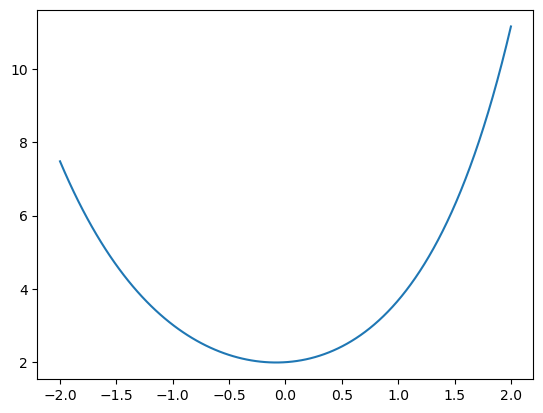

In [4]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-2,2,100)
a = np.exp(1.2*t)+np.exp(-1*t)
plt.plot(t,a)


In [18]:
import casadi as ca
a = ca.DM([[1,2],[3,4]])
ca.norm_2(a[:,-1]-a[:,-2])


a = ca.DM([[0.1,0.2,0.3,0.5,1.2,1.2,1.2]])
a=a-1.2

print(a>=0)
b=a>=0
print(ca.sum2(b))

print(ca.horzcat(1,3))
b = ca.DM([1,2,3,4,5])
print(b)
c = b
d=ca.Slice(1,3)

print(b[d])

[[0, 0, 0, 0, 1, 1, 1]]
3
[[1, 3]]
[1, 2, 3, 4, 5]
[2, 3]


In [4]:
import os

script_dir = os.path.dirname(__file__)
print("script dir:",script_dir)

last_dir = os.path.split(script_dir)[0]
print("last script is:",last_dir)

NameError: name '__file__' is not defined